In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'D:\\Hackathon\\Machinehack\\E-Commerce_Participants_Data'

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
submission=pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [4]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [5]:
submission.head()

,Selling_Price
0,2921.95
1,508.47
2,802.71
3,402.79
4,751.10


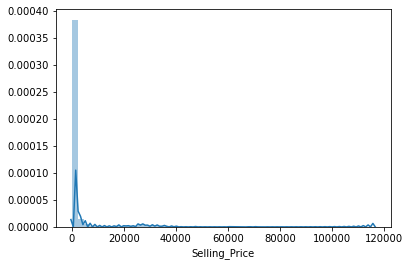

In [6]:
sns.distplot(train['Selling_Price'])

### The Target Variable is highly skewed. So we are going to normalize it by applying log transformation through np.log1p

In [7]:
train['Selling_Price']=np.log1p(train['Selling_Price'])

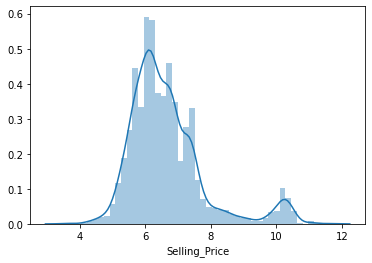

In [8]:
sns.distplot(train['Selling_Price'])

In [9]:
train.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,6.652575
std,1.187137,1.177109
min,1.000000,3.526361
25%,2.000000,5.918894
50%,3.100000,6.391917
75%,4.100000,7.086947
max,5.000000,11.663842


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [11]:
train.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

In [12]:
train.shape

(2452, 8)

In [13]:
train[(train['Product_Brand']=='B-3078')]['Item_Category'].nunique()

13

In [14]:
# Extracting Date features 
def extract_time_features(df):
    df['Date']=pd.to_datetime(df['Date'])
    #df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    #df['day_of_week'] = df['Date'].dt.dayofweek
    df['Day'] = df['Date'].dt.day
    df['DayOfyear'] = df['Date'].dt.dayofyear
    df['Week'] = pd.to_datetime(df['Date']).dt.week 
    df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter  
    df['Is_month_start'] = pd.to_datetime(df['Date']).dt.is_month_start 
    df['Is_month_end'] = pd.to_datetime(df['Date']).dt.is_month_end 
    del df['Date']
    return df

In [15]:
train=extract_time_features(train)
test=extract_time_features(test)

In [16]:
train['Unique_Item_category_per_product_brand']=train.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
train['Unique_Subcategory_1_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
train['Unique_Subcategory_2_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [17]:
test['Unique_Item_category_per_product_brand']=test.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
test['Unique_Subcategory_1_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
test['Unique_Subcategory_2_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [18]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100


In [19]:
# We will concat both train and test data set to apply some feature engineering like Label Encoder
total=pd.concat([train,test],0)

In [20]:
total.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100


In [21]:
# total['average_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('mean')
# total['average_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('mean')
# total['average_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('mean')
# total['average_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('mean')

In [22]:
total['std_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('std')
total['std_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('std')
total['std_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('std')
total['std_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('std')

In [23]:
# total['var_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('var')
# total['var_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('var')
# total['var_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('var')
# total['var_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('var')

In [24]:
total['Product_Brand']=total['Product_Brand'].str.lstrip('B-').astype(int)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
cat=['Item_Category','Subcategory_1','Subcategory_2']
for items in cat:
    total[items]=le.fit_transform(total[items])

In [27]:
total.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,...,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand,std_rating_per_product_brand,std_rating_Item_Category,std_rating_Subcategory_1,std_rating_Subcategory_2
0,P-2610,659,9,11,159,4.3,5.676754,2,3,34,...,1,False,False,1,1,1,NaN,1.105474,1.094790,1.018614
1,P-2453,3078,17,139,387,3.1,6.800170,7,1,182,...,3,True,False,13,29,100,1.197104,1.205383,1.227087,1.186726
2,P-6802,1810,38,119,118,3.5,6.675823,1,12,12,...,1,False,False,1,1,1,1.202082,1.192523,1.094301,1.028398
3,P-4452,3078,12,40,155,4.0,6.731018,12,12,346,...,4,False,False,13,29,100,1.197104,1.215595,0.636396,NaN
4,P-8454,3078,17,86,344,4.3,6.154858,12,12,346,...,4,False,False,13,29,100,1.197104,1.205383,1.146774,1.123001


In [28]:
train.shape

(2452, 17)

In [29]:
train_final=total[:train.shape[0]]
test_final=total[train.shape[0]:]

In [30]:
train_final.shape

(2452, 21)

In [31]:
test_final.shape

(1051, 21)

In [32]:
X=train_final.drop(['Product','Selling_Price'],1)
y=train_final['Selling_Price']
test_final=test_final.drop(['Product','Selling_Price'],1)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

# XGBoost

In [34]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )
#model.fit(X_train, y_train)
model_2.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[12:28:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.1829
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2.39335
[200]	validation_0-rmse:1.10566
[300]	validation_0-rmse:0.748487
[400]	validation_0-rmse:0.670934
[500]	validation_0-rmse:0.653117
[600]	validation_0-rmse:0.646693
[700]	validation_0-rmse:0.643097
[800]	validation_0-rmse:0.639965
[900]	validation_0-rmse:0.638277
[1000]	validation_0-rmse:0.636763
[1100]	validation_0-rmse:0.636547
[1200]	validation_0-rmse:0.636175
[1300]	validation_0-rmse:0.636223
Stopping. Best iteration:
[1286]	validation_0-rmse:0.636041



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

In [35]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=1350,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(X,y)

[12:28:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

[12:28:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
score

array([-0.70489114, -0.63219413, -0.64454623, -0.64454668, -0.66270616])

In [38]:
np.mean(score)

-0.6577768670309349

In [39]:
y_pred1=xgb.predict(test_final)

In [40]:
y_pred1=np.expm1(y_pred1)

In [41]:
y_pred1

array([2317.383  ,  395.8467 ,  743.4759 , ..., 1353.5061 ,  383.00787,
       1349.5165 ], dtype=float32)

In [42]:
pd.DataFrame(list(zip(X.columns,xgb_model.feature_importances_*100)))

,0,1
0,Product_Brand,1.417697
1,Item_Category,3.897341
2,Subcategory_1,3.069462
3,Subcategory_2,7.511923
4,Item_Rating,0.827977
5,month,2.562474
6,Day,3.090106
7,DayOfyear,25.312138
8,Week,1.465710
9,Quarter,2.866860


# LGBM

In [43]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}
lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [44]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)
clf_lgb.fit(X_train, y_train, **lgb_fit_params)
clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 0.771544
[200]	valid's rmse: 0.683172
[300]	valid's rmse: 0.655636
[400]	valid's rmse: 0.644102
[500]	valid's rmse: 0.639337
[600]	valid's rmse: 0.63667
[700]	valid's rmse: 0.634326
[800]	valid's rmse: 0.633185
[900]	valid's rmse: 0.632294
Early stopping, best iteration is:
[940]	valid's rmse: 0.631924


940

In [45]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(X, y)

In [46]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [47]:
score

array([-0.70730587, -0.65582149, -0.64233212, -0.64650094, -0.66590654])

In [48]:
np.mean(score)

-0.6635733910463217

In [49]:
pd.DataFrame(list(zip(X.columns,clf_lgb.feature_importances_)))

,0,1
0,Product_Brand,5242
1,Item_Category,1922
2,Subcategory_1,1931
3,Subcategory_2,3046
4,Item_Rating,3713
5,month,931
6,Day,1697
7,DayOfyear,1778
8,Week,1169
9,Quarter,8


In [50]:
y_pred2=lgb_model.predict(test_final)

In [51]:
y_pred2=np.expm1(y_pred2)

In [52]:
y_pred2

array([2216.00499484,  378.73163792,  755.94135457, ..., 1365.44078059,
        396.66753436, 1358.70092729])

# CatBoost Regressor

In [53]:
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()
cbr.fit(X,y)

0:	learn: 1.1588355	total: 57.3ms	remaining: 57.2s
1:	learn: 1.1415261	total: 58.9ms	remaining: 29.4s
2:	learn: 1.1246462	total: 60.5ms	remaining: 20.1s
3:	learn: 1.1095183	total: 62ms	remaining: 15.4s
4:	learn: 1.0930605	total: 63.5ms	remaining: 12.6s
5:	learn: 1.0794247	total: 65ms	remaining: 10.8s
6:	learn: 1.0650034	total: 66.6ms	remaining: 9.44s
7:	learn: 1.0517978	total: 68.1ms	remaining: 8.44s
8:	learn: 1.0395031	total: 69.6ms	remaining: 7.66s
9:	learn: 1.0269817	total: 71.1ms	remaining: 7.04s
10:	learn: 1.0154938	total: 72.6ms	remaining: 6.52s
11:	learn: 1.0042291	total: 74.1ms	remaining: 6.1s
12:	learn: 0.9937107	total: 75.8ms	remaining: 5.75s
13:	learn: 0.9822840	total: 77.3ms	remaining: 5.44s
14:	learn: 0.9717317	total: 78.8ms	remaining: 5.17s
15:	learn: 0.9617431	total: 80.3ms	remaining: 4.94s
16:	learn: 0.9512877	total: 81.9ms	remaining: 4.73s
17:	learn: 0.9415281	total: 83.4ms	remaining: 4.55s
18:	learn: 0.9333224	total: 84.9ms	remaining: 4.38s
19:	learn: 0.9251321	total:

209:	learn: 0.6128212	total: 387ms	remaining: 1.46s
210:	learn: 0.6124917	total: 389ms	remaining: 1.45s
211:	learn: 0.6120048	total: 390ms	remaining: 1.45s
212:	learn: 0.6115006	total: 392ms	remaining: 1.45s
213:	learn: 0.6113222	total: 394ms	remaining: 1.45s
214:	learn: 0.6108823	total: 395ms	remaining: 1.44s
215:	learn: 0.6105395	total: 397ms	remaining: 1.44s
216:	learn: 0.6102535	total: 399ms	remaining: 1.44s
217:	learn: 0.6098552	total: 401ms	remaining: 1.44s
218:	learn: 0.6093729	total: 402ms	remaining: 1.44s
219:	learn: 0.6091928	total: 404ms	remaining: 1.43s
220:	learn: 0.6088326	total: 405ms	remaining: 1.43s
221:	learn: 0.6084902	total: 407ms	remaining: 1.43s
222:	learn: 0.6080343	total: 409ms	remaining: 1.42s
223:	learn: 0.6077530	total: 410ms	remaining: 1.42s
224:	learn: 0.6074329	total: 412ms	remaining: 1.42s
225:	learn: 0.6072455	total: 413ms	remaining: 1.42s
226:	learn: 0.6068128	total: 415ms	remaining: 1.41s
227:	learn: 0.6064433	total: 417ms	remaining: 1.41s
228:	learn: 

412:	learn: 0.5473735	total: 724ms	remaining: 1.03s
413:	learn: 0.5471796	total: 726ms	remaining: 1.03s
414:	learn: 0.5469341	total: 727ms	remaining: 1.02s
415:	learn: 0.5466239	total: 729ms	remaining: 1.02s
416:	learn: 0.5462840	total: 731ms	remaining: 1.02s
417:	learn: 0.5460001	total: 732ms	remaining: 1.02s
418:	learn: 0.5457741	total: 734ms	remaining: 1.02s
419:	learn: 0.5456715	total: 735ms	remaining: 1.01s
420:	learn: 0.5455483	total: 737ms	remaining: 1.01s
421:	learn: 0.5452266	total: 739ms	remaining: 1.01s
422:	learn: 0.5449281	total: 740ms	remaining: 1.01s
423:	learn: 0.5447699	total: 742ms	remaining: 1.01s
424:	learn: 0.5444035	total: 744ms	remaining: 1.01s
425:	learn: 0.5441696	total: 745ms	remaining: 1s
426:	learn: 0.5439184	total: 747ms	remaining: 1s
427:	learn: 0.5434811	total: 748ms	remaining: 1s
428:	learn: 0.5431597	total: 750ms	remaining: 998ms
429:	learn: 0.5428961	total: 752ms	remaining: 997ms
430:	learn: 0.5425524	total: 754ms	remaining: 996ms
431:	learn: 0.5422935

616:	learn: 0.4939531	total: 1.06s	remaining: 660ms
617:	learn: 0.4935825	total: 1.06s	remaining: 658ms
618:	learn: 0.4934864	total: 1.07s	remaining: 656ms
619:	learn: 0.4932762	total: 1.07s	remaining: 655ms
620:	learn: 0.4929889	total: 1.07s	remaining: 653ms
621:	learn: 0.4928579	total: 1.07s	remaining: 651ms
622:	learn: 0.4925883	total: 1.07s	remaining: 649ms
623:	learn: 0.4921674	total: 1.07s	remaining: 647ms
624:	learn: 0.4918263	total: 1.08s	remaining: 646ms
625:	learn: 0.4916598	total: 1.08s	remaining: 644ms
626:	learn: 0.4913798	total: 1.08s	remaining: 642ms
627:	learn: 0.4911150	total: 1.08s	remaining: 640ms
628:	learn: 0.4907779	total: 1.08s	remaining: 639ms
629:	learn: 0.4906184	total: 1.08s	remaining: 637ms
630:	learn: 0.4903859	total: 1.08s	remaining: 635ms
631:	learn: 0.4902108	total: 1.09s	remaining: 633ms
632:	learn: 0.4899235	total: 1.09s	remaining: 632ms
633:	learn: 0.4896258	total: 1.09s	remaining: 630ms
634:	learn: 0.4894690	total: 1.09s	remaining: 628ms
635:	learn: 

832:	learn: 0.4509866	total: 1.4s	remaining: 281ms
833:	learn: 0.4509620	total: 1.41s	remaining: 280ms
834:	learn: 0.4507753	total: 1.41s	remaining: 278ms
835:	learn: 0.4506828	total: 1.41s	remaining: 276ms
836:	learn: 0.4505690	total: 1.41s	remaining: 275ms
837:	learn: 0.4503846	total: 1.41s	remaining: 273ms
838:	learn: 0.4502503	total: 1.41s	remaining: 271ms
839:	learn: 0.4500955	total: 1.42s	remaining: 270ms
840:	learn: 0.4499223	total: 1.42s	remaining: 268ms
841:	learn: 0.4498122	total: 1.42s	remaining: 266ms
842:	learn: 0.4495464	total: 1.42s	remaining: 265ms
843:	learn: 0.4493816	total: 1.42s	remaining: 263ms
844:	learn: 0.4492430	total: 1.42s	remaining: 261ms
845:	learn: 0.4489850	total: 1.43s	remaining: 260ms
846:	learn: 0.4489365	total: 1.43s	remaining: 258ms
847:	learn: 0.4488090	total: 1.43s	remaining: 256ms
848:	learn: 0.4487329	total: 1.43s	remaining: 255ms
849:	learn: 0.4485654	total: 1.43s	remaining: 253ms
850:	learn: 0.4484645	total: 1.44s	remaining: 251ms
851:	learn: 0

In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=cbr,scoring='neg_root_mean_squared_error',cv=5)

0:	learn: 1.1470236	total: 3.32ms	remaining: 3.32s
1:	learn: 1.1306875	total: 4.93ms	remaining: 2.46s
2:	learn: 1.1146231	total: 6.36ms	remaining: 2.11s
3:	learn: 1.0992191	total: 7.8ms	remaining: 1.94s
4:	learn: 1.0842965	total: 9.36ms	remaining: 1.86s
5:	learn: 1.0704726	total: 10.7ms	remaining: 1.78s
6:	learn: 1.0570422	total: 12.3ms	remaining: 1.74s
7:	learn: 1.0426802	total: 13.7ms	remaining: 1.7s
8:	learn: 1.0299211	total: 15.3ms	remaining: 1.69s
9:	learn: 1.0180405	total: 16.7ms	remaining: 1.66s
10:	learn: 1.0071410	total: 18.2ms	remaining: 1.63s
11:	learn: 0.9966058	total: 19.8ms	remaining: 1.63s
12:	learn: 0.9848148	total: 21.3ms	remaining: 1.61s
13:	learn: 0.9753389	total: 22.8ms	remaining: 1.6s
14:	learn: 0.9644951	total: 24.2ms	remaining: 1.59s
15:	learn: 0.9545119	total: 25.8ms	remaining: 1.58s
16:	learn: 0.9449132	total: 27.2ms	remaining: 1.57s
17:	learn: 0.9373153	total: 28.8ms	remaining: 1.57s
18:	learn: 0.9298163	total: 30.2ms	remaining: 1.56s
19:	learn: 0.9213612	tota

224:	learn: 0.5881165	total: 332ms	remaining: 1.15s
225:	learn: 0.5874667	total: 334ms	remaining: 1.14s
226:	learn: 0.5872007	total: 335ms	remaining: 1.14s
227:	learn: 0.5867582	total: 337ms	remaining: 1.14s
228:	learn: 0.5859273	total: 338ms	remaining: 1.14s
229:	learn: 0.5853848	total: 340ms	remaining: 1.14s
230:	learn: 0.5849824	total: 341ms	remaining: 1.14s
231:	learn: 0.5845792	total: 342ms	remaining: 1.13s
232:	learn: 0.5841385	total: 344ms	remaining: 1.13s
233:	learn: 0.5838598	total: 345ms	remaining: 1.13s
234:	learn: 0.5835215	total: 347ms	remaining: 1.13s
235:	learn: 0.5827642	total: 348ms	remaining: 1.13s
236:	learn: 0.5822590	total: 349ms	remaining: 1.12s
237:	learn: 0.5820262	total: 351ms	remaining: 1.12s
238:	learn: 0.5815879	total: 352ms	remaining: 1.12s
239:	learn: 0.5809543	total: 354ms	remaining: 1.12s
240:	learn: 0.5804857	total: 355ms	remaining: 1.12s
241:	learn: 0.5800597	total: 357ms	remaining: 1.12s
242:	learn: 0.5798260	total: 359ms	remaining: 1.12s
243:	learn: 

467:	learn: 0.5087927	total: 668ms	remaining: 759ms
468:	learn: 0.5084660	total: 669ms	remaining: 758ms
469:	learn: 0.5078957	total: 671ms	remaining: 757ms
470:	learn: 0.5074848	total: 672ms	remaining: 755ms
471:	learn: 0.5071294	total: 674ms	remaining: 754ms
472:	learn: 0.5068759	total: 675ms	remaining: 752ms
473:	learn: 0.5068531	total: 677ms	remaining: 751ms
474:	learn: 0.5065014	total: 678ms	remaining: 749ms
475:	learn: 0.5061170	total: 679ms	remaining: 748ms
476:	learn: 0.5056752	total: 681ms	remaining: 746ms
477:	learn: 0.5054719	total: 682ms	remaining: 745ms
478:	learn: 0.5053681	total: 683ms	remaining: 743ms
479:	learn: 0.5052187	total: 685ms	remaining: 742ms
480:	learn: 0.5051008	total: 686ms	remaining: 741ms
481:	learn: 0.5048563	total: 688ms	remaining: 739ms
482:	learn: 0.5046920	total: 689ms	remaining: 738ms
483:	learn: 0.5043780	total: 690ms	remaining: 736ms
484:	learn: 0.5042627	total: 692ms	remaining: 735ms
485:	learn: 0.5039278	total: 693ms	remaining: 733ms
486:	learn: 

716:	learn: 0.4517297	total: 1.01s	remaining: 397ms
717:	learn: 0.4517188	total: 1.01s	remaining: 396ms
718:	learn: 0.4517030	total: 1.01s	remaining: 395ms
719:	learn: 0.4516924	total: 1.01s	remaining: 393ms
720:	learn: 0.4513953	total: 1.01s	remaining: 392ms
721:	learn: 0.4511728	total: 1.01s	remaining: 390ms
722:	learn: 0.4508916	total: 1.01s	remaining: 389ms
723:	learn: 0.4506300	total: 1.02s	remaining: 387ms
724:	learn: 0.4506133	total: 1.02s	remaining: 386ms
725:	learn: 0.4503435	total: 1.02s	remaining: 385ms
726:	learn: 0.4503320	total: 1.02s	remaining: 383ms
727:	learn: 0.4500919	total: 1.02s	remaining: 382ms
728:	learn: 0.4500839	total: 1.02s	remaining: 380ms
729:	learn: 0.4498519	total: 1.02s	remaining: 379ms
730:	learn: 0.4496319	total: 1.03s	remaining: 378ms
731:	learn: 0.4493614	total: 1.03s	remaining: 376ms
732:	learn: 0.4493522	total: 1.03s	remaining: 375ms
733:	learn: 0.4491053	total: 1.03s	remaining: 373ms
734:	learn: 0.4489646	total: 1.03s	remaining: 372ms
735:	learn: 

949:	learn: 0.4088602	total: 1.34s	remaining: 70.7ms
950:	learn: 0.4086814	total: 1.34s	remaining: 69.3ms
951:	learn: 0.4085125	total: 1.34s	remaining: 67.8ms
952:	learn: 0.4082812	total: 1.35s	remaining: 66.4ms
953:	learn: 0.4081382	total: 1.35s	remaining: 65ms
954:	learn: 0.4079220	total: 1.35s	remaining: 63.6ms
955:	learn: 0.4077119	total: 1.35s	remaining: 62.2ms
956:	learn: 0.4076418	total: 1.35s	remaining: 60.8ms
957:	learn: 0.4073469	total: 1.35s	remaining: 59.4ms
958:	learn: 0.4071991	total: 1.35s	remaining: 58ms
959:	learn: 0.4069975	total: 1.36s	remaining: 56.6ms
960:	learn: 0.4067907	total: 1.36s	remaining: 55.2ms
961:	learn: 0.4066871	total: 1.36s	remaining: 53.7ms
962:	learn: 0.4065767	total: 1.36s	remaining: 52.3ms
963:	learn: 0.4064483	total: 1.36s	remaining: 50.9ms
964:	learn: 0.4062651	total: 1.36s	remaining: 49.5ms
965:	learn: 0.4059970	total: 1.37s	remaining: 48.1ms
966:	learn: 0.4058995	total: 1.37s	remaining: 46.7ms
967:	learn: 0.4057091	total: 1.37s	remaining: 45.3

110:	learn: 0.6698476	total: 164ms	remaining: 1.31s
111:	learn: 0.6687285	total: 165ms	remaining: 1.31s
112:	learn: 0.6678249	total: 167ms	remaining: 1.31s
113:	learn: 0.6673152	total: 168ms	remaining: 1.31s
114:	learn: 0.6666332	total: 170ms	remaining: 1.31s
115:	learn: 0.6659562	total: 172ms	remaining: 1.31s
116:	learn: 0.6651045	total: 173ms	remaining: 1.31s
117:	learn: 0.6638195	total: 175ms	remaining: 1.3s
118:	learn: 0.6628743	total: 176ms	remaining: 1.3s
119:	learn: 0.6618694	total: 178ms	remaining: 1.3s
120:	learn: 0.6613187	total: 179ms	remaining: 1.3s
121:	learn: 0.6601822	total: 180ms	remaining: 1.3s
122:	learn: 0.6595430	total: 182ms	remaining: 1.3s
123:	learn: 0.6585247	total: 183ms	remaining: 1.29s
124:	learn: 0.6577066	total: 185ms	remaining: 1.29s
125:	learn: 0.6570293	total: 186ms	remaining: 1.29s
126:	learn: 0.6560890	total: 188ms	remaining: 1.29s
127:	learn: 0.6553493	total: 190ms	remaining: 1.29s
128:	learn: 0.6544977	total: 191ms	remaining: 1.29s
129:	learn: 0.6539

339:	learn: 0.5619802	total: 498ms	remaining: 967ms
340:	learn: 0.5618030	total: 500ms	remaining: 966ms
341:	learn: 0.5614180	total: 501ms	remaining: 964ms
342:	learn: 0.5611420	total: 503ms	remaining: 963ms
343:	learn: 0.5606332	total: 504ms	remaining: 962ms
344:	learn: 0.5603670	total: 506ms	remaining: 960ms
345:	learn: 0.5599092	total: 507ms	remaining: 959ms
346:	learn: 0.5596312	total: 509ms	remaining: 957ms
347:	learn: 0.5593225	total: 510ms	remaining: 956ms
348:	learn: 0.5589496	total: 511ms	remaining: 954ms
349:	learn: 0.5585235	total: 513ms	remaining: 953ms
350:	learn: 0.5578230	total: 514ms	remaining: 951ms
351:	learn: 0.5575901	total: 516ms	remaining: 950ms
352:	learn: 0.5572824	total: 517ms	remaining: 948ms
353:	learn: 0.5570798	total: 519ms	remaining: 947ms
354:	learn: 0.5568585	total: 521ms	remaining: 946ms
355:	learn: 0.5563299	total: 522ms	remaining: 945ms
356:	learn: 0.5560053	total: 524ms	remaining: 943ms
357:	learn: 0.5555864	total: 525ms	remaining: 942ms
358:	learn: 

576:	learn: 0.4918609	total: 835ms	remaining: 612ms
577:	learn: 0.4915771	total: 837ms	remaining: 611ms
578:	learn: 0.4912339	total: 838ms	remaining: 610ms
579:	learn: 0.4910944	total: 840ms	remaining: 608ms
580:	learn: 0.4906955	total: 841ms	remaining: 607ms
581:	learn: 0.4905617	total: 843ms	remaining: 605ms
582:	learn: 0.4903937	total: 844ms	remaining: 604ms
583:	learn: 0.4901443	total: 845ms	remaining: 602ms
584:	learn: 0.4898019	total: 847ms	remaining: 601ms
585:	learn: 0.4895511	total: 848ms	remaining: 599ms
586:	learn: 0.4892332	total: 850ms	remaining: 598ms
587:	learn: 0.4891417	total: 851ms	remaining: 596ms
588:	learn: 0.4889041	total: 853ms	remaining: 595ms
589:	learn: 0.4888286	total: 854ms	remaining: 593ms
590:	learn: 0.4887720	total: 855ms	remaining: 591ms
591:	learn: 0.4884858	total: 856ms	remaining: 590ms
592:	learn: 0.4881679	total: 857ms	remaining: 589ms
593:	learn: 0.4880961	total: 859ms	remaining: 587ms
594:	learn: 0.4877061	total: 860ms	remaining: 586ms
595:	learn: 

818:	learn: 0.4387527	total: 1.17s	remaining: 259ms
819:	learn: 0.4385233	total: 1.18s	remaining: 258ms
820:	learn: 0.4383869	total: 1.18s	remaining: 257ms
821:	learn: 0.4383317	total: 1.18s	remaining: 255ms
822:	learn: 0.4381354	total: 1.18s	remaining: 254ms
823:	learn: 0.4379316	total: 1.18s	remaining: 252ms
824:	learn: 0.4378864	total: 1.18s	remaining: 251ms
825:	learn: 0.4376038	total: 1.18s	remaining: 249ms
826:	learn: 0.4373937	total: 1.19s	remaining: 248ms
827:	learn: 0.4371715	total: 1.19s	remaining: 247ms
828:	learn: 0.4369444	total: 1.19s	remaining: 245ms
829:	learn: 0.4367500	total: 1.19s	remaining: 244ms
830:	learn: 0.4365140	total: 1.19s	remaining: 242ms
831:	learn: 0.4361884	total: 1.19s	remaining: 241ms
832:	learn: 0.4361719	total: 1.19s	remaining: 239ms
833:	learn: 0.4359982	total: 1.2s	remaining: 238ms
834:	learn: 0.4358578	total: 1.2s	remaining: 237ms
835:	learn: 0.4357287	total: 1.2s	remaining: 235ms
836:	learn: 0.4355108	total: 1.2s	remaining: 234ms
837:	learn: 0.43

0:	learn: 1.1652965	total: 3.58ms	remaining: 3.58s
1:	learn: 1.1475738	total: 5.16ms	remaining: 2.58s
2:	learn: 1.1310566	total: 6.55ms	remaining: 2.18s
3:	learn: 1.1152860	total: 8.04ms	remaining: 2s
4:	learn: 1.0994370	total: 9.52ms	remaining: 1.89s
5:	learn: 1.0851312	total: 10.9ms	remaining: 1.8s
6:	learn: 1.0702465	total: 12.3ms	remaining: 1.74s
7:	learn: 1.0563261	total: 14.7ms	remaining: 1.82s
8:	learn: 1.0427109	total: 16.3ms	remaining: 1.79s
9:	learn: 1.0292012	total: 18.1ms	remaining: 1.79s
10:	learn: 1.0187082	total: 19.6ms	remaining: 1.76s
11:	learn: 1.0076774	total: 21.1ms	remaining: 1.73s
12:	learn: 0.9964324	total: 22.7ms	remaining: 1.72s
13:	learn: 0.9854590	total: 24.2ms	remaining: 1.71s
14:	learn: 0.9742656	total: 25.6ms	remaining: 1.68s
15:	learn: 0.9639029	total: 27ms	remaining: 1.66s
16:	learn: 0.9530279	total: 28.7ms	remaining: 1.66s
17:	learn: 0.9438386	total: 30.4ms	remaining: 1.66s
18:	learn: 0.9349627	total: 31.8ms	remaining: 1.64s
19:	learn: 0.9263986	total: 

225:	learn: 0.5998687	total: 331ms	remaining: 1.13s
226:	learn: 0.5992781	total: 333ms	remaining: 1.13s
227:	learn: 0.5989538	total: 334ms	remaining: 1.13s
228:	learn: 0.5982492	total: 336ms	remaining: 1.13s
229:	learn: 0.5977794	total: 337ms	remaining: 1.13s
230:	learn: 0.5973015	total: 338ms	remaining: 1.13s
231:	learn: 0.5970131	total: 340ms	remaining: 1.12s
232:	learn: 0.5966641	total: 341ms	remaining: 1.12s
233:	learn: 0.5963554	total: 342ms	remaining: 1.12s
234:	learn: 0.5959359	total: 344ms	remaining: 1.12s
235:	learn: 0.5955197	total: 345ms	remaining: 1.12s
236:	learn: 0.5950176	total: 346ms	remaining: 1.11s
237:	learn: 0.5946352	total: 348ms	remaining: 1.11s
238:	learn: 0.5941090	total: 349ms	remaining: 1.11s
239:	learn: 0.5938620	total: 350ms	remaining: 1.11s
240:	learn: 0.5934565	total: 352ms	remaining: 1.11s
241:	learn: 0.5930964	total: 353ms	remaining: 1.11s
242:	learn: 0.5926261	total: 355ms	remaining: 1.1s
243:	learn: 0.5922008	total: 356ms	remaining: 1.1s
244:	learn: 0.

474:	learn: 0.5218145	total: 666ms	remaining: 736ms
475:	learn: 0.5214346	total: 667ms	remaining: 735ms
476:	learn: 0.5210656	total: 669ms	remaining: 733ms
477:	learn: 0.5208196	total: 670ms	remaining: 732ms
478:	learn: 0.5206887	total: 671ms	remaining: 730ms
479:	learn: 0.5205285	total: 673ms	remaining: 729ms
480:	learn: 0.5203430	total: 674ms	remaining: 727ms
481:	learn: 0.5202047	total: 675ms	remaining: 726ms
482:	learn: 0.5200401	total: 677ms	remaining: 724ms
483:	learn: 0.5198355	total: 678ms	remaining: 723ms
484:	learn: 0.5194682	total: 679ms	remaining: 721ms
485:	learn: 0.5191965	total: 681ms	remaining: 720ms
486:	learn: 0.5191353	total: 681ms	remaining: 718ms
487:	learn: 0.5187634	total: 683ms	remaining: 716ms
488:	learn: 0.5184943	total: 684ms	remaining: 715ms
489:	learn: 0.5181667	total: 686ms	remaining: 714ms
490:	learn: 0.5179636	total: 687ms	remaining: 712ms
491:	learn: 0.5177115	total: 689ms	remaining: 711ms
492:	learn: 0.5173517	total: 690ms	remaining: 710ms
493:	learn: 

715:	learn: 0.4633508	total: 1s	remaining: 398ms
716:	learn: 0.4629683	total: 1s	remaining: 396ms
717:	learn: 0.4627198	total: 1s	remaining: 395ms
718:	learn: 0.4624375	total: 1.01s	remaining: 394ms
719:	learn: 0.4621887	total: 1.01s	remaining: 392ms
720:	learn: 0.4621180	total: 1.01s	remaining: 391ms
721:	learn: 0.4619355	total: 1.01s	remaining: 389ms
722:	learn: 0.4618130	total: 1.01s	remaining: 388ms
723:	learn: 0.4616115	total: 1.01s	remaining: 386ms
724:	learn: 0.4612395	total: 1.01s	remaining: 385ms
725:	learn: 0.4610885	total: 1.02s	remaining: 384ms
726:	learn: 0.4609917	total: 1.02s	remaining: 382ms
727:	learn: 0.4607259	total: 1.02s	remaining: 381ms
728:	learn: 0.4605322	total: 1.02s	remaining: 380ms
729:	learn: 0.4602925	total: 1.02s	remaining: 378ms
730:	learn: 0.4601033	total: 1.02s	remaining: 377ms
731:	learn: 0.4596297	total: 1.02s	remaining: 375ms
732:	learn: 0.4594079	total: 1.03s	remaining: 374ms
733:	learn: 0.4593184	total: 1.03s	remaining: 373ms
734:	learn: 0.4590262

954:	learn: 0.4199615	total: 1.34s	remaining: 63.1ms
955:	learn: 0.4198059	total: 1.34s	remaining: 61.7ms
956:	learn: 0.4197737	total: 1.34s	remaining: 60.3ms
957:	learn: 0.4197063	total: 1.34s	remaining: 58.9ms
958:	learn: 0.4196344	total: 1.34s	remaining: 57.5ms
959:	learn: 0.4196012	total: 1.35s	remaining: 56.1ms
960:	learn: 0.4193884	total: 1.35s	remaining: 54.7ms
961:	learn: 0.4191389	total: 1.35s	remaining: 53.3ms
962:	learn: 0.4190557	total: 1.35s	remaining: 51.9ms
963:	learn: 0.4187410	total: 1.35s	remaining: 50.5ms
964:	learn: 0.4186286	total: 1.35s	remaining: 49.1ms
965:	learn: 0.4185099	total: 1.35s	remaining: 47.7ms
966:	learn: 0.4184400	total: 1.36s	remaining: 46.3ms
967:	learn: 0.4183073	total: 1.36s	remaining: 44.9ms
968:	learn: 0.4182870	total: 1.36s	remaining: 43.5ms
969:	learn: 0.4181478	total: 1.36s	remaining: 42.1ms
970:	learn: 0.4179000	total: 1.36s	remaining: 40.7ms
971:	learn: 0.4177190	total: 1.36s	remaining: 39.3ms
972:	learn: 0.4176508	total: 1.36s	remaining: 

115:	learn: 0.6580547	total: 165ms	remaining: 1.26s
116:	learn: 0.6576240	total: 167ms	remaining: 1.26s
117:	learn: 0.6569046	total: 168ms	remaining: 1.25s
118:	learn: 0.6561101	total: 169ms	remaining: 1.25s
119:	learn: 0.6552917	total: 171ms	remaining: 1.25s
120:	learn: 0.6548348	total: 172ms	remaining: 1.25s
121:	learn: 0.6538284	total: 173ms	remaining: 1.25s
122:	learn: 0.6531728	total: 175ms	remaining: 1.25s
123:	learn: 0.6524046	total: 176ms	remaining: 1.24s
124:	learn: 0.6513117	total: 178ms	remaining: 1.24s
125:	learn: 0.6503195	total: 179ms	remaining: 1.24s
126:	learn: 0.6497121	total: 180ms	remaining: 1.24s
127:	learn: 0.6492134	total: 182ms	remaining: 1.24s
128:	learn: 0.6483755	total: 183ms	remaining: 1.24s
129:	learn: 0.6471526	total: 185ms	remaining: 1.24s
130:	learn: 0.6463432	total: 186ms	remaining: 1.23s
131:	learn: 0.6451301	total: 188ms	remaining: 1.23s
132:	learn: 0.6440247	total: 189ms	remaining: 1.23s
133:	learn: 0.6433898	total: 190ms	remaining: 1.23s
134:	learn: 

363:	learn: 0.5427849	total: 502ms	remaining: 877ms
364:	learn: 0.5421751	total: 504ms	remaining: 876ms
365:	learn: 0.5419520	total: 505ms	remaining: 875ms
366:	learn: 0.5415473	total: 506ms	remaining: 873ms
367:	learn: 0.5409570	total: 508ms	remaining: 872ms
368:	learn: 0.5404537	total: 509ms	remaining: 871ms
369:	learn: 0.5401839	total: 511ms	remaining: 869ms
370:	learn: 0.5399965	total: 512ms	remaining: 868ms
371:	learn: 0.5394202	total: 513ms	remaining: 867ms
372:	learn: 0.5390270	total: 515ms	remaining: 865ms
373:	learn: 0.5386747	total: 516ms	remaining: 864ms
374:	learn: 0.5384873	total: 517ms	remaining: 862ms
375:	learn: 0.5382650	total: 519ms	remaining: 862ms
376:	learn: 0.5376705	total: 521ms	remaining: 861ms
377:	learn: 0.5373988	total: 522ms	remaining: 859ms
378:	learn: 0.5369086	total: 524ms	remaining: 858ms
379:	learn: 0.5365330	total: 525ms	remaining: 857ms
380:	learn: 0.5364652	total: 526ms	remaining: 855ms
381:	learn: 0.5361209	total: 528ms	remaining: 854ms
382:	learn: 

590:	learn: 0.4752298	total: 836ms	remaining: 579ms
591:	learn: 0.4747679	total: 838ms	remaining: 577ms
592:	learn: 0.4745596	total: 839ms	remaining: 576ms
593:	learn: 0.4743972	total: 840ms	remaining: 574ms
594:	learn: 0.4740790	total: 842ms	remaining: 573ms
595:	learn: 0.4740683	total: 843ms	remaining: 571ms
596:	learn: 0.4737736	total: 844ms	remaining: 570ms
597:	learn: 0.4736345	total: 846ms	remaining: 569ms
598:	learn: 0.4732321	total: 847ms	remaining: 567ms
599:	learn: 0.4730632	total: 849ms	remaining: 566ms
600:	learn: 0.4728277	total: 850ms	remaining: 564ms
601:	learn: 0.4725027	total: 851ms	remaining: 563ms
602:	learn: 0.4723043	total: 853ms	remaining: 562ms
603:	learn: 0.4721094	total: 854ms	remaining: 560ms
604:	learn: 0.4718598	total: 856ms	remaining: 559ms
605:	learn: 0.4714835	total: 857ms	remaining: 557ms
606:	learn: 0.4711166	total: 859ms	remaining: 556ms
607:	learn: 0.4707858	total: 860ms	remaining: 554ms
608:	learn: 0.4705280	total: 861ms	remaining: 553ms
609:	learn: 

819:	learn: 0.4285849	total: 1.17s	remaining: 257ms
820:	learn: 0.4284158	total: 1.17s	remaining: 256ms
821:	learn: 0.4283718	total: 1.18s	remaining: 255ms
822:	learn: 0.4282477	total: 1.18s	remaining: 253ms
823:	learn: 0.4279163	total: 1.18s	remaining: 252ms
824:	learn: 0.4278167	total: 1.18s	remaining: 250ms
825:	learn: 0.4274999	total: 1.18s	remaining: 249ms
826:	learn: 0.4273053	total: 1.18s	remaining: 247ms
827:	learn: 0.4270924	total: 1.18s	remaining: 246ms
828:	learn: 0.4267016	total: 1.19s	remaining: 244ms
829:	learn: 0.4266922	total: 1.19s	remaining: 243ms
830:	learn: 0.4264297	total: 1.19s	remaining: 242ms
831:	learn: 0.4264230	total: 1.19s	remaining: 240ms
832:	learn: 0.4262226	total: 1.19s	remaining: 239ms
833:	learn: 0.4260988	total: 1.19s	remaining: 237ms
834:	learn: 0.4259656	total: 1.19s	remaining: 236ms
835:	learn: 0.4258261	total: 1.19s	remaining: 234ms
836:	learn: 0.4256335	total: 1.2s	remaining: 233ms
837:	learn: 0.4254353	total: 1.2s	remaining: 232ms
838:	learn: 0.

0:	learn: 1.1619037	total: 2.95ms	remaining: 2.95s
1:	learn: 1.1448314	total: 4.38ms	remaining: 2.18s
2:	learn: 1.1285158	total: 5.78ms	remaining: 1.92s
3:	learn: 1.1133279	total: 7.17ms	remaining: 1.78s
4:	learn: 1.0981666	total: 8.63ms	remaining: 1.72s
5:	learn: 1.0841180	total: 9.93ms	remaining: 1.65s
6:	learn: 1.0705598	total: 11.3ms	remaining: 1.6s
7:	learn: 1.0574747	total: 12.6ms	remaining: 1.56s
8:	learn: 1.0443228	total: 13.9ms	remaining: 1.53s
9:	learn: 1.0305533	total: 15.2ms	remaining: 1.51s
10:	learn: 1.0202152	total: 16.6ms	remaining: 1.49s
11:	learn: 1.0095273	total: 17.9ms	remaining: 1.47s
12:	learn: 0.9982002	total: 19.3ms	remaining: 1.46s
13:	learn: 0.9872160	total: 20.6ms	remaining: 1.45s
14:	learn: 0.9763533	total: 22ms	remaining: 1.44s
15:	learn: 0.9656790	total: 23.3ms	remaining: 1.43s
16:	learn: 0.9563129	total: 24.7ms	remaining: 1.43s
17:	learn: 0.9474490	total: 26.1ms	remaining: 1.42s
18:	learn: 0.9394644	total: 27.4ms	remaining: 1.42s
19:	learn: 0.9311451	tota

238:	learn: 0.5962817	total: 341ms	remaining: 1.08s
239:	learn: 0.5956790	total: 342ms	remaining: 1.08s
240:	learn: 0.5953430	total: 343ms	remaining: 1.08s
241:	learn: 0.5948772	total: 345ms	remaining: 1.08s
242:	learn: 0.5945286	total: 346ms	remaining: 1.08s
243:	learn: 0.5938958	total: 348ms	remaining: 1.08s
244:	learn: 0.5933092	total: 349ms	remaining: 1.07s
245:	learn: 0.5929927	total: 350ms	remaining: 1.07s
246:	learn: 0.5923667	total: 352ms	remaining: 1.07s
247:	learn: 0.5920493	total: 353ms	remaining: 1.07s
248:	learn: 0.5918150	total: 354ms	remaining: 1.07s
249:	learn: 0.5915295	total: 356ms	remaining: 1.07s
250:	learn: 0.5910788	total: 357ms	remaining: 1.06s
251:	learn: 0.5906745	total: 358ms	remaining: 1.06s
252:	learn: 0.5904589	total: 360ms	remaining: 1.06s
253:	learn: 0.5899542	total: 361ms	remaining: 1.06s
254:	learn: 0.5896792	total: 363ms	remaining: 1.06s
255:	learn: 0.5894309	total: 364ms	remaining: 1.06s
256:	learn: 0.5888694	total: 366ms	remaining: 1.06s
257:	learn: 

477:	learn: 0.5164767	total: 676ms	remaining: 738ms
478:	learn: 0.5160804	total: 677ms	remaining: 737ms
479:	learn: 0.5157621	total: 679ms	remaining: 735ms
480:	learn: 0.5154999	total: 680ms	remaining: 734ms
481:	learn: 0.5153076	total: 681ms	remaining: 732ms
482:	learn: 0.5147714	total: 683ms	remaining: 731ms
483:	learn: 0.5144100	total: 684ms	remaining: 729ms
484:	learn: 0.5142708	total: 685ms	remaining: 728ms
485:	learn: 0.5141393	total: 687ms	remaining: 726ms
486:	learn: 0.5134904	total: 688ms	remaining: 725ms
487:	learn: 0.5132738	total: 690ms	remaining: 723ms
488:	learn: 0.5129518	total: 691ms	remaining: 722ms
489:	learn: 0.5127679	total: 692ms	remaining: 720ms
490:	learn: 0.5126665	total: 694ms	remaining: 719ms
491:	learn: 0.5122479	total: 695ms	remaining: 718ms
492:	learn: 0.5120600	total: 696ms	remaining: 716ms
493:	learn: 0.5114959	total: 698ms	remaining: 715ms
494:	learn: 0.5112637	total: 699ms	remaining: 713ms
495:	learn: 0.5110987	total: 701ms	remaining: 712ms
496:	learn: 

720:	learn: 0.4542798	total: 1.01s	remaining: 392ms
721:	learn: 0.4541293	total: 1.01s	remaining: 391ms
722:	learn: 0.4539269	total: 1.02s	remaining: 389ms
723:	learn: 0.4537649	total: 1.02s	remaining: 388ms
724:	learn: 0.4535885	total: 1.02s	remaining: 387ms
725:	learn: 0.4532675	total: 1.02s	remaining: 385ms
726:	learn: 0.4530871	total: 1.02s	remaining: 384ms
727:	learn: 0.4529090	total: 1.02s	remaining: 382ms
728:	learn: 0.4526520	total: 1.02s	remaining: 381ms
729:	learn: 0.4524018	total: 1.03s	remaining: 380ms
730:	learn: 0.4521283	total: 1.03s	remaining: 378ms
731:	learn: 0.4518797	total: 1.03s	remaining: 377ms
732:	learn: 0.4516745	total: 1.03s	remaining: 375ms
733:	learn: 0.4514634	total: 1.03s	remaining: 374ms
734:	learn: 0.4511696	total: 1.03s	remaining: 372ms
735:	learn: 0.4509866	total: 1.03s	remaining: 371ms
736:	learn: 0.4506752	total: 1.03s	remaining: 370ms
737:	learn: 0.4504944	total: 1.04s	remaining: 368ms
738:	learn: 0.4502903	total: 1.04s	remaining: 367ms
739:	learn: 

960:	learn: 0.4105133	total: 1.35s	remaining: 54.8ms
961:	learn: 0.4103551	total: 1.35s	remaining: 53.4ms
962:	learn: 0.4102694	total: 1.35s	remaining: 52ms
963:	learn: 0.4102264	total: 1.35s	remaining: 50.5ms
964:	learn: 0.4100195	total: 1.35s	remaining: 49.1ms
965:	learn: 0.4098390	total: 1.36s	remaining: 47.7ms
966:	learn: 0.4096199	total: 1.36s	remaining: 46.3ms
967:	learn: 0.4095865	total: 1.36s	remaining: 44.9ms
968:	learn: 0.4093040	total: 1.36s	remaining: 43.5ms
969:	learn: 0.4091089	total: 1.36s	remaining: 42.1ms
970:	learn: 0.4089407	total: 1.36s	remaining: 40.7ms
971:	learn: 0.4087394	total: 1.36s	remaining: 39.3ms
972:	learn: 0.4085634	total: 1.36s	remaining: 37.9ms
973:	learn: 0.4084185	total: 1.37s	remaining: 36.5ms
974:	learn: 0.4082866	total: 1.37s	remaining: 35.1ms
975:	learn: 0.4080861	total: 1.37s	remaining: 33.7ms
976:	learn: 0.4080266	total: 1.37s	remaining: 32.3ms
977:	learn: 0.4078598	total: 1.37s	remaining: 30.9ms
978:	learn: 0.4076873	total: 1.38s	remaining: 29

In [55]:
score

array([-0.71430941, -0.62946454, -0.65309555, -0.66681265, -0.65475282])

In [56]:
np.mean(score)

-0.6636869935067751

In [57]:
y_pred3=cbr.predict(test_final)

y_pred3=np.expm1(y_pred3)

y_pred3

array([2176.27436856,  394.57362385,  799.75802591, ..., 1342.73455371,
        526.69600309, 1342.83182061])

In [58]:
y_pred=(0.1*y_pred1)+(y_pred2*0.8)+(y_pred3*0.1)
y_pred

array([2222.1697445 ,  382.02734374,  759.07647383, ..., 1361.9766963 ,
        408.30441668, 1356.19556879])

In [59]:
submission_new=pd.DataFrame(np.round(abs(y_pred),2),columns=['Selling_Price'])

In [60]:
submission_new.head()

,Selling_Price
0,2222.17
1,382.03
2,759.08
3,355.33
4,749.95


In [61]:
submission_new.to_excel('submission_final.xlsx',index=False)